In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the complaints.csv file created after cleaning the data
complaints = pd.read_csv("complaints.csv", index_col=0)
complaints.head()

,Address_precinct,Hood,Complaint_date,Complaint_time,Key_code,Offense_level,Offense_desc,Suspect_age,Suspect_race,Suspect_sex,Victim_age,Victim_race,Victim_sex,Latitude,Longitude,Lat_Lon
0,48.0,BRONX,2019-06-25 00:00:00,2019-07-28 14:15:00,578,VIOLATION,HARRASSMENT 2,UNKNOWN,BLACK,M,25-44,BLACK,F,40.853355,-73.881668,"(40.85335545600003, -73.88166837799997)"
1,14.0,MANHATTAN,2019-06-25 00:00:00,2019-07-28 13:55:00,341,MISDEMEANOR,PETIT LARCENY,45-64,BLACK,M,UNKNOWN,UNKNOWN,D,40.750431,-73.989282,"(40.75043076800005, -73.98928217599996)"
2,18.0,MANHATTAN,2019-06-25 00:00:00,2019-07-28 13:20:00,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,NaN,NaN,45-64,WHITE,M,40.761677,-73.974917,"(40.761676504000036, -73.97491700299997)"
3,52.0,BRONX,2019-06-25 00:00:00,2019-07-28 13:20:00,104,FELONY,RAPE,45-64,BLACK HISPANIC,M,25-44,WHITE HISPANIC,F,40.869059,-73.879630,"(40.86905853200005, -73.87963014799993)"
4,19.0,MANHATTAN,2019-06-25 00:00:00,2019-07-28 13:20:00,578,VIOLATION,HARRASSMENT 2,25-44,BLACK,M,45-64,BLACK,M,40.783426,-73.949163,"(40.78342557000008, -73.94916258199999)"


In [3]:
# Checking the types of the column
complaints.dtypes

Address_precinct    float64
Hood                 object
Complaint_date       object
Complaint_time       object
Key_code              int64
Offense_level        object
Offense_desc         object
Suspect_age          object
Suspect_race         object
Suspect_sex          object
Victim_age           object
Victim_race          object
Victim_sex           object
Latitude            float64
Longitude           float64
Lat_Lon              object
dtype: object

In [4]:
# As the type for Complaint_date and Complaint_time is as object I need to change them to datetime format
complaints = complaints.astype({"Complaint_date": "datetime64"})
complaints = complaints.astype({"Complaint_time": "datetime64"})

In [5]:
# Checking the types of the columns again to see if the format has changed to datetime
complaints.dtypes

Address_precinct           float64
Hood                        object
Complaint_date      datetime64[ns]
Complaint_time      datetime64[ns]
Key_code                     int64
Offense_level               object
Offense_desc                object
Suspect_age                 object
Suspect_race                object
Suspect_sex                 object
Victim_age                  object
Victim_race                 object
Victim_sex                  object
Latitude                   float64
Longitude                  float64
Lat_Lon                     object
dtype: object

In [6]:
# Check the composition of the Hood column
complaints.Hood.unique()

array(['BRONX', 'MANHATTAN', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND', nan],
      dtype=object)

In [7]:
# Create a complaints_hood dataframe where the NaN's in Hood column are removed
complaints_hood = complaints.dropna(subset=["Hood"])

In [8]:
complaints_hood.head()

,Address_precinct,Hood,Complaint_date,Complaint_time,Key_code,Offense_level,Offense_desc,Suspect_age,Suspect_race,Suspect_sex,Victim_age,Victim_race,Victim_sex,Latitude,Longitude,Lat_Lon
0,48.0,BRONX,2019-06-25,2019-07-28 14:15:00,578,VIOLATION,HARRASSMENT 2,UNKNOWN,BLACK,M,25-44,BLACK,F,40.853355,-73.881668,"(40.85335545600003, -73.88166837799997)"
1,14.0,MANHATTAN,2019-06-25,2019-07-28 13:55:00,341,MISDEMEANOR,PETIT LARCENY,45-64,BLACK,M,UNKNOWN,UNKNOWN,D,40.750431,-73.989282,"(40.75043076800005, -73.98928217599996)"
2,18.0,MANHATTAN,2019-06-25,2019-07-28 13:20:00,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,NaN,NaN,45-64,WHITE,M,40.761677,-73.974917,"(40.761676504000036, -73.97491700299997)"
3,52.0,BRONX,2019-06-25,2019-07-28 13:20:00,104,FELONY,RAPE,45-64,BLACK HISPANIC,M,25-44,WHITE HISPANIC,F,40.869059,-73.879630,"(40.86905853200005, -73.87963014799993)"
4,19.0,MANHATTAN,2019-06-25,2019-07-28 13:20:00,578,VIOLATION,HARRASSMENT 2,25-44,BLACK,M,45-64,BLACK,M,40.783426,-73.949163,"(40.78342557000008, -73.94916258199999)"


In [9]:
# Check it's been removed
complaints_hood.Hood.unique()

array(['BRONX', 'MANHATTAN', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

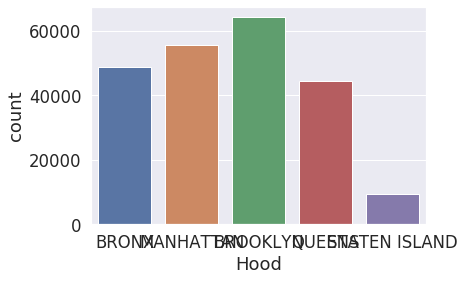

In [11]:
# Find out the distribution of complaints by neighbourhood
sns.set(font_scale=1.5)
sns.countplot(complaints_hood['Hood'])

Text(0, 0.5, 'Number of complaints')

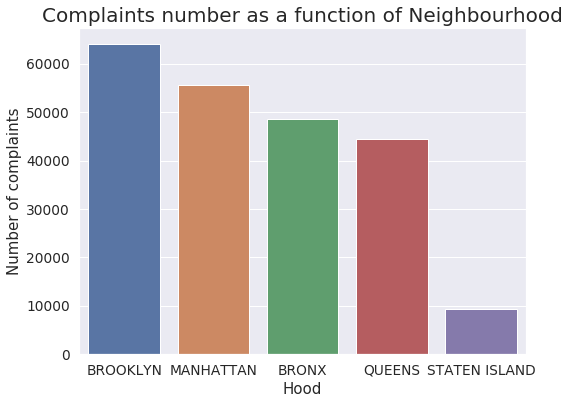

In [24]:
# Order the plot in descending order and set the figure size
sns.set(rc={'figure.figsize':(8,6)})
sns.set(font_scale=1.25)
b = sns.countplot(complaints_hood['Hood'], order=complaints_hood['Hood'].value_counts().index)
b.axes.set_title("Complaints number as a function of Neighbourhood",fontsize=20)
b.set_ylabel("Number of complaints",fontsize=15)

In [26]:
# Let's drop the E and D from Victim_sex results that correspond to Unkown victims information
complaints_vict_sex = complaints[~complaints.Victim_sex.str.contains("E|D")]

Text(0, 0.5, 'Number of complaints')

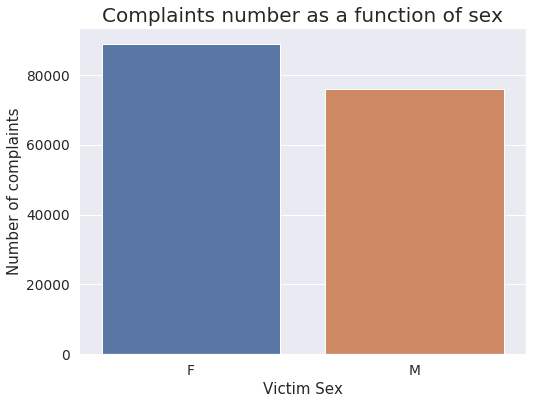

In [28]:
# Find out the distribution of complaints by victim sex
sns.set(font_scale=1.25)
b = sns.countplot(complaints_vict_sex['Victim_sex'])
b.axes.set_title("Complaints number as a function of sex",fontsize=20)
b.set_xlabel("Victim Sex",fontsize=15)
b.set_ylabel("Number of complaints",fontsize=15)

### Complaints number as a function of Ethnic background

In [9]:
# Let's drop the Unknown info from Victim_race
complaints_vict_race = complaints[~complaints.Victim_race.str.contains("UNKNOWN")]

In [10]:
# Calculation of the number of complaints per ethnic background
complaints_vict_race.groupby(["Victim_race"]).count()
# orders.groupby(["CustomerID"]).count()

,Address_precinct,Hood,Complaint_date,Complaint_time,Key_code,Offense_level,Offense_desc,Suspect_age,Suspect_race,Suspect_sex,Victim_age,Victim_sex,Latitude,Longitude,Lat_Lon
Victim_race,,,,,,,,,,,,,,,
AMERICAN INDIAN/ALASKAN NATIVE,1228,1228,1228,1228,1228,1228,1228,939,939,939,1228,1228,1228,1228,1228
ASIAN / PACIFIC ISLANDER,16263,16251,16263,16263,16263,16263,16263,11818,11818,11818,16263,16263,16263,16263,16263
BLACK,56314,56233,56315,56315,56315,56315,56314,45216,45216,45216,56315,56315,56309,56309,56309
BLACK HISPANIC,8822,8817,8822,8822,8822,8822,8822,7155,7155,7155,8822,8822,8822,8822,8822
WHITE,34412,34403,34412,34412,34412,34412,34412,24404,24404,24404,34412,34412,34412,34412,34412
WHITE HISPANIC,38425,38401,38429,38429,38429,38429,38425,31061,31061,31061,38429,38429,38421,38421,38421


Text(0, 0.5, 'Number of complaints')

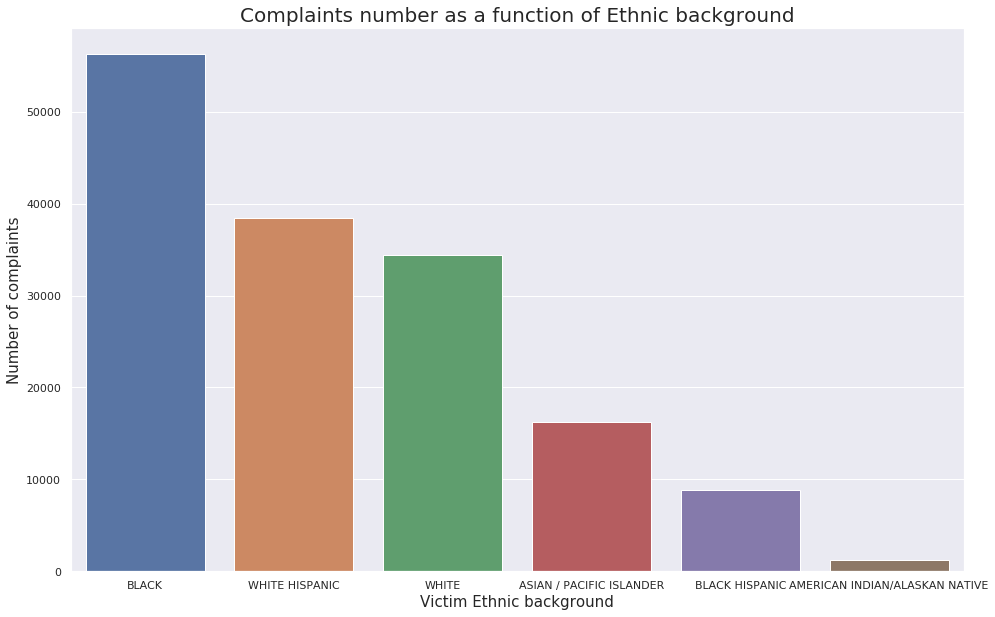

In [30]:
# Find out the distribution of complaints by victim race
sns.set(font_scale=1.25)
sns.set(rc={'figure.figsize':(16,10)})
b = sns.countplot(complaints_vict_race['Victim_race'], order=complaints_vict_race['Victim_race'].value_counts().index)
b.axes.set_title("Complaints number as a function of Ethnic background",fontsize=20)
b.set_xlabel("Victim Ethnic background",fontsize=15)
b.set_ylabel("Number of complaints",fontsize=15)

I want to analyse the amount of complaints by time of day.  In order to do so I will create a new column called 
Complaint_hour and I will remove the column called Complaint_time

In [31]:
# Create a new column called Complaint_hour that takes the hour of each day
complaints["Complaint_hour"] = complaints.Complaint_time.dt.hour

In [32]:
# I delete the column called Complaint_time
complaints = complaints.drop(columns=["Complaint_time"])

In [33]:
complaints.head()

,Address_precinct,Hood,Complaint_date,Key_code,Offense_level,Offense_desc,Suspect_age,Suspect_race,Suspect_sex,Victim_age,Victim_race,Victim_sex,Latitude,Longitude,Lat_Lon,Complaint_hour
0,48.0,BRONX,2019-06-25,578,VIOLATION,HARRASSMENT 2,UNKNOWN,BLACK,M,25-44,BLACK,F,40.853355,-73.881668,"(40.85335545600003, -73.88166837799997)",14
1,14.0,MANHATTAN,2019-06-25,341,MISDEMEANOR,PETIT LARCENY,45-64,BLACK,M,UNKNOWN,UNKNOWN,D,40.750431,-73.989282,"(40.75043076800005, -73.98928217599996)",13
2,18.0,MANHATTAN,2019-06-25,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,NaN,NaN,45-64,WHITE,M,40.761677,-73.974917,"(40.761676504000036, -73.97491700299997)",13
3,52.0,BRONX,2019-06-25,104,FELONY,RAPE,45-64,BLACK HISPANIC,M,25-44,WHITE HISPANIC,F,40.869059,-73.879630,"(40.86905853200005, -73.87963014799993)",13
4,19.0,MANHATTAN,2019-06-25,578,VIOLATION,HARRASSMENT 2,25-44,BLACK,M,45-64,BLACK,M,40.783426,-73.949163,"(40.78342557000008, -73.94916258199999)",13


Text(0, 0.5, 'Number of complaints')

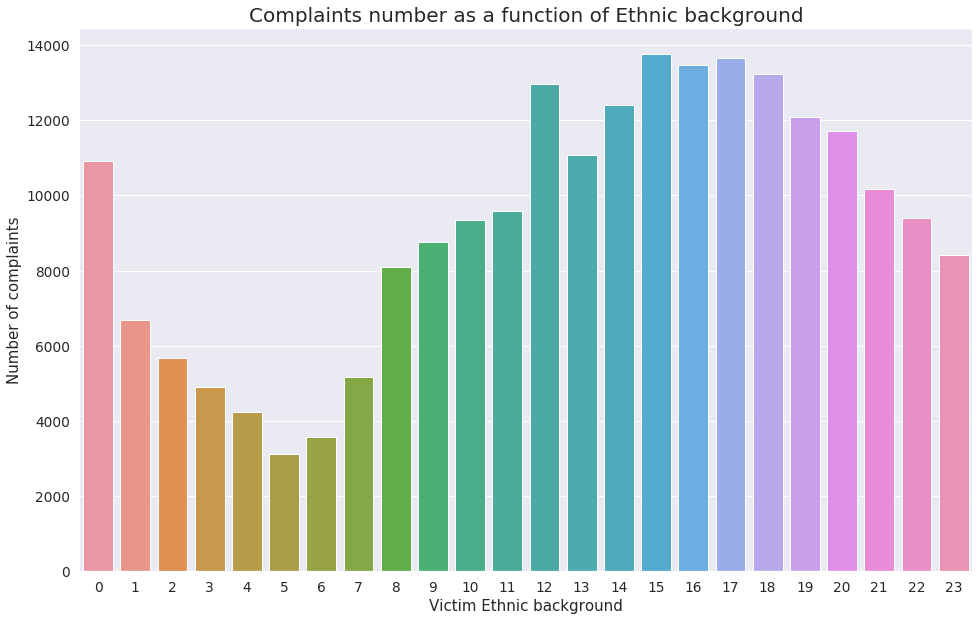

In [34]:
# Find out the distribution of complaints by hour
sns.set(font_scale=1.25)
b = sns.countplot(complaints['Complaint_hour'])
b.axes.set_title("Complaints number per hour",fontsize=20)
b.set_xlabel("Hour",fontsize=15)
b.set_ylabel("Number of complaints",fontsize=15)

I want to analyse the amount of complaints by day. In order to do so I will create a new column called Complaint_day

In [41]:
# Create a new column called Complaint_day that takes the day of each week
complaints["Complaint_day"] = complaints.Complaint_date.dt.weekday_name

In [42]:
complaints.head()

,Address_precinct,Hood,Complaint_date,Key_code,Offense_level,Offense_desc,Suspect_age,Suspect_race,Suspect_sex,Victim_age,Victim_race,Victim_sex,Latitude,Longitude,Lat_Lon,Complaint_hour,Complaint_day
0,48.0,BRONX,2019-06-25,578,VIOLATION,HARRASSMENT 2,UNKNOWN,BLACK,M,25-44,BLACK,F,40.853355,-73.881668,"(40.85335545600003, -73.88166837799997)",14,Tuesday
1,14.0,MANHATTAN,2019-06-25,341,MISDEMEANOR,PETIT LARCENY,45-64,BLACK,M,UNKNOWN,UNKNOWN,D,40.750431,-73.989282,"(40.75043076800005, -73.98928217599996)",13,Tuesday
2,18.0,MANHATTAN,2019-06-25,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,NaN,NaN,45-64,WHITE,M,40.761677,-73.974917,"(40.761676504000036, -73.97491700299997)",13,Tuesday
3,52.0,BRONX,2019-06-25,104,FELONY,RAPE,45-64,BLACK HISPANIC,M,25-44,WHITE HISPANIC,F,40.869059,-73.879630,"(40.86905853200005, -73.87963014799993)",13,Tuesday
4,19.0,MANHATTAN,2019-06-25,578,VIOLATION,HARRASSMENT 2,25-44,BLACK,M,45-64,BLACK,M,40.783426,-73.949163,"(40.78342557000008, -73.94916258199999)",13,Tuesday


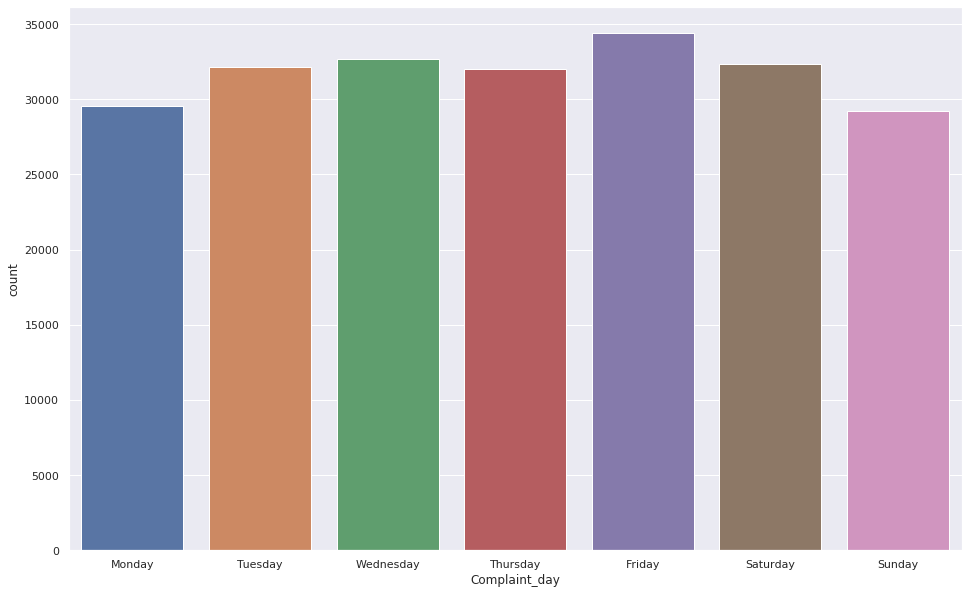

In [47]:
# Find out the distribution of complaints by day of the week
sns.countplot(complaints['Complaint_day'], order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])   

I am now going to try to plot the data on a map using Folium. I first try it on a 500 points sample.
First with markers only and second with markers that can automatically cluster.

In [55]:
import folium

Now I plot the map with all the samples with automatic clustering when zooming in.

In [80]:
# I need to remove the NaN's from latitude and longitude by creating a complaints_geo dataframe where the NaN's in Hood column are removed
complaints_geo = complaints.dropna(subset=["Latitude"])

In [77]:
# Create Map visualization using Folium and Marker Cluster
subset_of_df = complaints_geo.sample(n=5000)
from folium.plugins import MarkerCluster
some_map = folium.Map(location=[subset_of_df["Latitude"].mean(), subset_of_df["Longitude"].mean()], zoom_start=9)
mc = MarkerCluster()
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in subset_of_df.itertuples():
    mc.add_child(folium.Marker(location=[row.Latitude, row.Longitude]))
some_map.add_child(mc)
some_map

In [78]:
# Create Map visualization using Folium and Marker Cluster and save it in html as otherwise it doesn't appear
# in Jupyter Notebook
subset_of_df = complaints_geo.sample(n=7000)
from folium.plugins import MarkerCluster
some_map = folium.Map(location=[subset_of_df["Latitude"].mean(), subset_of_df["Longitude"].mean()], zoom_start=9)
mc = MarkerCluster()
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in subset_of_df.itertuples():
    mc.add_child(folium.Marker(location=[row.Latitude, row.Longitude]))
some_map.add_child(mc)
some_map.save("mymap.html")

In order to plot the evolution of the complaints per month I create a new column named Complaint_month with 
January = 1 and December = 12 

In [81]:
complaints_geo["Complaint_month"] = complaints_geo.Complaint_date.dt.month
complaints_geo.head()

/home/linuxbrew/.linuxbrew/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Address_precinct,Hood,Complaint_date,Key_code,Offense_level,Offense_desc,Suspect_age,Suspect_race,Suspect_sex,Victim_age,Victim_race,Victim_sex,Latitude,Longitude,Lat_Lon,Complaint_hour,Complaint_day,Complaint_month
0,48.0,BRONX,2019-06-25,578,VIOLATION,HARRASSMENT 2,UNKNOWN,BLACK,M,25-44,BLACK,F,40.853355,-73.881668,"(40.85335545600003, -73.88166837799997)",14,Tuesday,6
1,14.0,MANHATTAN,2019-06-25,341,MISDEMEANOR,PETIT LARCENY,45-64,BLACK,M,UNKNOWN,UNKNOWN,D,40.750431,-73.989282,"(40.75043076800005, -73.98928217599996)",13,Tuesday,6
2,18.0,MANHATTAN,2019-06-25,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,NaN,NaN,45-64,WHITE,M,40.761677,-73.974917,"(40.761676504000036, -73.97491700299997)",13,Tuesday,6
3,52.0,BRONX,2019-06-25,104,FELONY,RAPE,45-64,BLACK HISPANIC,M,25-44,WHITE HISPANIC,F,40.869059,-73.879630,"(40.86905853200005, -73.87963014799993)",13,Tuesday,6
4,19.0,MANHATTAN,2019-06-25,578,VIOLATION,HARRASSMENT 2,25-44,BLACK,M,45-64,BLACK,M,40.783426,-73.949163,"(40.78342557000008, -73.94916258199999)",13,Tuesday,6


In [87]:
# Create Map visualization for felony crimes using Folium and Marker Cluster and save it in html
from folium import plugins

some_map = folium.Map(location=[complaints_geo["Latitude"].mean(), complaints_geo["Longitude"].mean()], zoom_start=10)

# Filter the DF for rows, then columns
heat_df = complaints_geo[complaints_geo['Offense_level']=='FELONY'] # Reducing data size so it runs faster
heat_df = heat_df[['Latitude', 'Longitude']]

# Create weight column, using date
heat_df['Weight'] = complaints_geo['Complaint_month']
heat_df['Weight'] = heat_df['Weight'].astype(float)


# List comprehension to make out list of lists
heat_data = [[[row['Latitude'],row['Longitude']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,13)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data, radius=4, auto_play=True, max_opacity=0.8)
hm.add_to(some_map)

# Save map to html
some_map.save("heatmap_felony.html")

In [92]:
complaints.Suspect_race.value_counts()

BLACK                             64042
UNKNOWN                           41741
WHITE HISPANIC                    30278
WHITE                             17218
BLACK HISPANIC                     9470
ASIAN / PACIFIC ISLANDER           6736
AMERICAN INDIAN/ALASKAN NATIVE      531
Name: Suspect_race, dtype: int64

In [53]:
complaints.Victim_race.unique()

array(['BLACK', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)